Dataset cargado correctamente:


,date,close,high,low,open,volume,symbol_id,symbol
666,2023-12-29,0.090970,0.093000,0.088430,0.091740,6.178169e+07,2,Dogecoin
0,2023-12-30,42156.902344,42584.125000,41556.226562,42091.753906,1.601393e+10,0,Bitcoin
667,2023-12-30,0.090000,0.091400,0.089200,0.090960,3.148657e+07,2,Dogecoin
1332,2023-12-30,2292.065430,2322.021484,2270.011963,2300.399658,6.888195e+09,1,Ethereum
1,2023-12-31,42265.187500,42860.937500,41998.253906,42152.097656,1.639750e+10,0,Bitcoin


Estadísticas básicas por criptomoneda:


,count,mean,std,min,25%,50%,75%,max
symbol,,,,,,,,
Bitcoin,666.0,82600.917453,23009.325283,39507.367188,63400.915039,83253.832031,104153.949219,124752.531250
Dogecoin,666.0,0.189483,0.085792,0.077950,0.124990,0.169980,0.228837,0.466350
Ethereum,666.0,3040.316222,737.514284,1472.553101,2502.406372,3013.427246,3547.696533,4831.348633


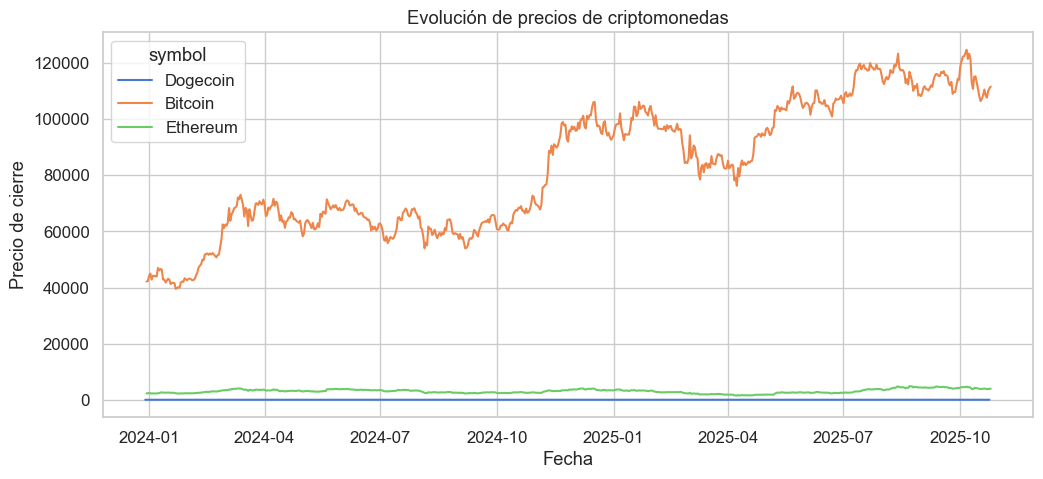


Descomponiendo serie de: Dogecoin


C:\Users\juanm\AppData\Local\Temp\ipykernel_8588\1252810461.py:71: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_symbol = df[df["symbol"] == symbol].set_index("date").asfreq("D").interpolate()


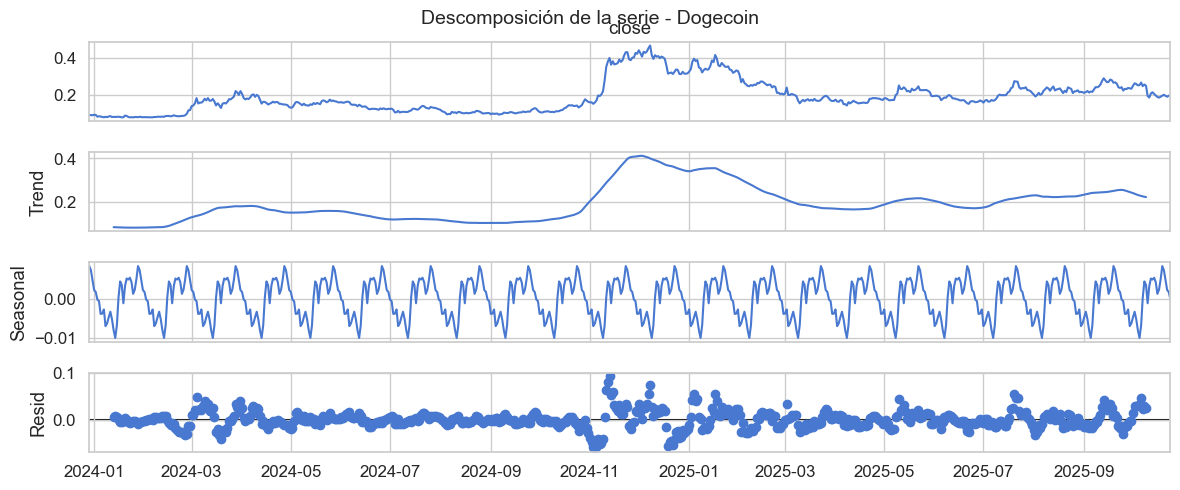


Descomponiendo serie de: Bitcoin


C:\Users\juanm\AppData\Local\Temp\ipykernel_8588\1252810461.py:71: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_symbol = df[df["symbol"] == symbol].set_index("date").asfreq("D").interpolate()


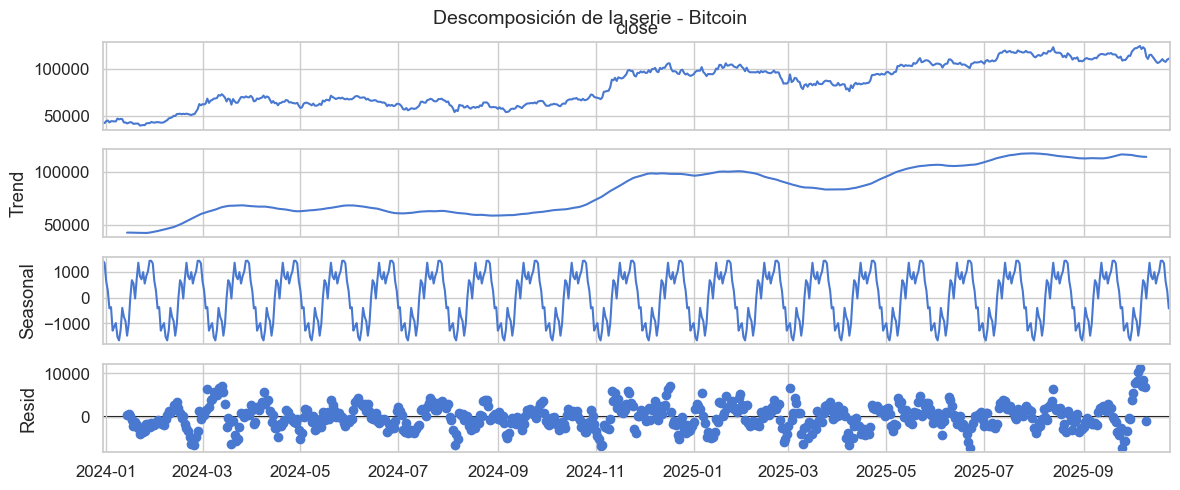


Descomponiendo serie de: Ethereum


C:\Users\juanm\AppData\Local\Temp\ipykernel_8588\1252810461.py:71: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_symbol = df[df["symbol"] == symbol].set_index("date").asfreq("D").interpolate()


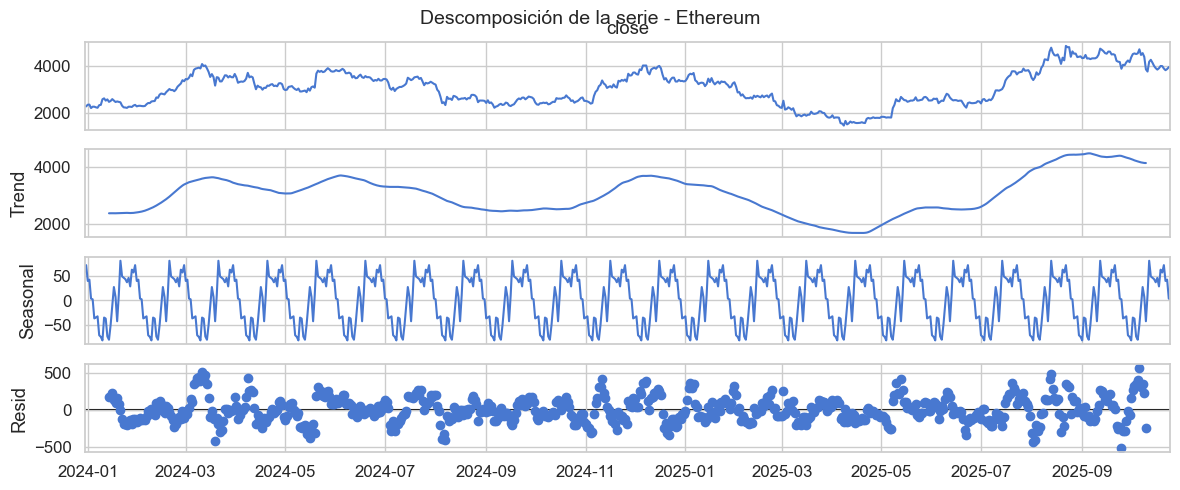

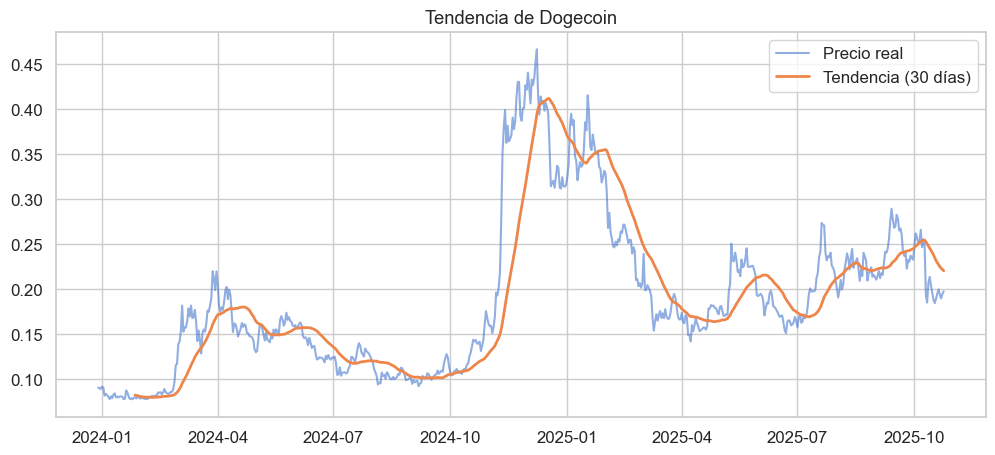

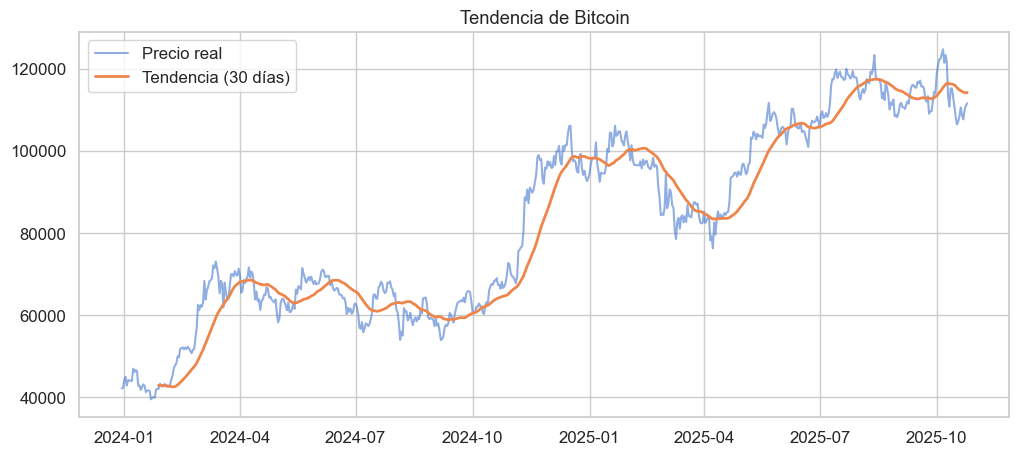

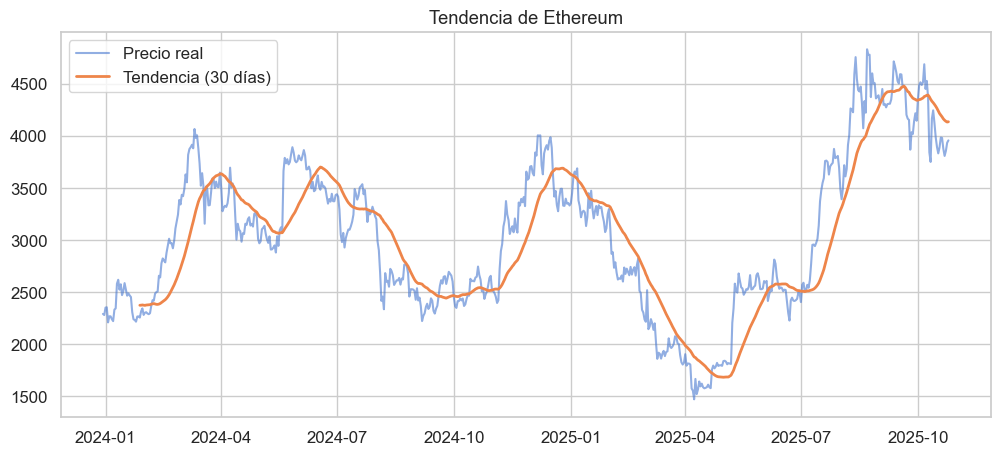

In [1]:
# ==============================================================
# Sprint 2 - Proyecto3BI
# ==============================================================
# Integrantes: Juan Manuel Blandón Ramírez - Miguel Angel Murillo - Jaminton Julián Leyton
# ==============================================================

# ==============================================================
# Importar librerías
# ==============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from statsmodels.tsa.seasonal import seasonal_decompose


import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense
from keras.optimizers import Adam
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler

# Mostrar gráficos inline
%matplotlib inline


# Configuración visual
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams["figure.figsize"] = (12, 5)

# ==============================================================
# Rutas del proyecto
# ==============================================================
DATA_PATH = Path("../data/crypto_dataset_final.csv")
OUTPUT_PATH = Path("../output")
OUTPUT_PATH.mkdir(exist_ok=True)

# ==============================================================
# Cargar y preparar los datos
# ==============================================================
df = pd.read_csv(DATA_PATH)
df["date"] = pd.to_datetime(df["date"], format='mixed', errors='coerce')
df = df.dropna(subset=["date"]).sort_values("date")

# Mapeo de símbolos
id_map = {0: "Bitcoin", 1: "Ethereum", 2: "Dogecoin"}
df["symbol"] = df["symbol_id"].map(id_map)

print("Dataset cargado correctamente:")
display(df.head())

# ==============================================================
# Análisis exploratorio
# ==============================================================
print("Estadísticas básicas por criptomoneda:")
display(df.groupby("symbol")["close"].describe())

sns.lineplot(data=df, x="date", y="close", hue="symbol")
plt.title("Evolución de precios de criptomonedas")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre")
plt.show()

# ==============================================================
# Descomposición de series (tendencia, estacionalidad, residuo)
# ==============================================================
for symbol in df["symbol"].unique():
    print(f"\nDescomponiendo serie de: {symbol}")
    df_symbol = df[df["symbol"] == symbol].set_index("date").asfreq("D").interpolate()

    decomposition = seasonal_decompose(df_symbol["close"], model="additive", period=30)

    decomposition.plot()
    plt.suptitle(f"Descomposición de la serie - {symbol}", fontsize=14)
    plt.show()

# ==============================================================
# Identificación de patrones y tendencias
# ==============================================================
# Tendencia: promedio móvil
window = 30
for symbol in df["symbol"].unique():
    df_symbol = df[df["symbol"] == symbol].copy()
    df_symbol["trend"] = df_symbol["close"].rolling(window=window).mean()

    plt.plot(df_symbol["date"], df_symbol["close"], label="Precio real", alpha=0.6)
    plt.plot(df_symbol["date"], df_symbol["trend"], label=f"Tendencia ({window} días)", linewidth=2)
    plt.title(f"Tendencia de {symbol}")
    plt.legend()
    plt.show()



Análisis:

### Evolución general de precios 

El primer gráfico muestra una divergencia notable en el comportamiento de las tres criptomonedas durante 2024-2025. Bitcoin (naranja) claramente domina en términos de precio absoluto, mostrando una trayectoria ascendente sostenida que lo llevó desde aproximadamente $40,000 a inicios de 2024 hasta superar los $120,000 en su pico de agosto 2025. Este crecimiento representa un incremento de casi 200%, consolidando a Bitcoin como el activo más robusto del trío analizado.

Ethereum exhibe un patrón similar pero con menor magnitud, transitando desde $2,000 hasta alcanzar picos cercanos a $5,000, lo que representa un crecimiento más moderado del 150% aproximadamente. Dogecoin permanece prácticamente plano en esta escala, oscilando cerca de cero en comparación con las otras dos, lo que evidencia su menor valor absoluto aunque no necesariamente su menor volatilidad relativa.

## Descomposición de Serie - Dogecoin

La descomposición temporal de Dogecoin revela patrones fascinantes. El componente de tendencia muestra una fase de estabilidad relativa hasta octubre 2024, seguida por un spike dramático que eleva el precio de $0.10 a $0.40 - un incremento del 300% en cuestión de semanas. Este comportamiento es característico de eventos especulativos masivos o noticias virales que impactan criptomonedas de baja capitalización.

El componente estacional presenta un patrón cíclico regular y pronunciado con periodicidad aproximada de 30-60 días, oscilando entre -0.01 y 0.01. Esta regularidad sugiere patrones de trading algorítmico o comportamiento cíclico de inversionistas retail. El componente residual muestra considerable heterocedasticidad, especialmente durante noviembre-diciembre 2024, coincidiendo con el período de mayor volatilidad en el precio, lo que indica eventos no capturados por tendencia o estacionalidad - probablemente shocks de mercado o manipulación.

## Descomposición de Serie - Bitcoin

Bitcoin presenta una descomposición mucho más estructurada. La tendencia exhibe un crecimiento casi lineal desde $40,000 hasta $120,000, con una aceleración notable desde octubre 2024. Este comportamiento sugiere adopción institucional creciente y flujos de capital sostenidos, muy diferente al comportamiento especulativo de Dogecoin.
El componente estacional mantiene un patrón cíclico consistente con amplitud de aproximadamente ±1,000 dólares, lo que en términos relativos representa apenas 1-2% del precio - significativamente menor que Dogecoin. Esto indica mayor madurez de mercado y participación de inversionistas institucionales que suavizan las oscilaciones. Los residuales muestran heterogeneidad temporal: relativamente controlados hasta octubre 2024, pero con incremento en dispersión durante el rally de fin de año, sugiriendo mayor incertidumbre y volatilidad intradiaria durante períodos de precio al alza.

## Descomposición de Serie - Ehtereum

Ethereum muestra características intermedias entre Bitcoin y Dogecoin. Su tendencia refleja un comportamiento más volátil que Bitcoin, con un pico pronunciado en marzo 2024 ($4,000), seguido de corrección, estabilización en $2,500-3,000, y recuperación dramática hacia $5,000 en julio-agosto 2025. Esta volatilidad adicional puede atribuirse a factores técnicos específicos de Ethereum (actualizaciones de protocolo, competencia de otras blockchains de smart contracts).
El componente estacional presenta amplitud similar al de Bitcoin en términos absolutos (±50 dólares), pero representa una proporción mayor del precio dado su menor valor. Los residuales son notablemente más dispersos que los de Bitcoin, especialmente durante marzo-abril 2024 y julio-septiembre 2025, correlacionando con períodos de alta volatilidad en el precio subyacente.

## Tendencias de 30 días
El análisis de tendencia móvil de Dogecoin revela lo extremo de su volatilidad: la tendencia de 30 días muestra el salto vertical de $0.10 a $0.40 pero también su colapso posterior a $0.15-0.25, donde se estabiliza. Actualmente, el precio real oscila alrededor de la tendencia móvil ($0.20-0.25), sugiriendo consolidación tras el evento especulativo. La divergencia entre precio real y tendencia es mínima actualmente, indicando menor momentum direccional.
Bitcoin muestra una tendencia móvil elegante y suavizada que captura perfectamente la transición de mercado alcista. La aceleración en la pendiente durante octubre 2024 es clara, y actualmente (octubre 2025) el precio real ($110,000) se mantiene ligeramente por debajo de la tendencia móvil ($115,000), lo que podría interpretarse como una corrección saludable o el inicio de consolidación tras el rally. La proximidad entre precio y tendencia sugiere movimiento lateral en el corto plazo.

Ethereum presenta la relación más volátil entre precio real y tendencia. Múltiples divergencias significativas son visibles: el precio supera dramáticamente la tendencia en julio-agosto 2025 (alcanzando $5,000 vs tendencia de $4,400), seguido por una corrección donde el precio cae por debajo de la tendencia ($3,800 vs $4,200). Actualmente, ambas líneas convergen alrededor de $4,000, pero la reciente caída del precio real por debajo de la tendencia sugiere presión bajista que podría continuar.

#### Análisis de clusterización

Se aplican los siguientes métodos:
1. **K-Means (particional)**
2. **DBSCAN (basado en densidad)**
3. **Jerárquico (Agglomerative Clustering)**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Cargar dataset final
df = pd.read_csv("../data/crypto_dataset_final.csv")

# Variables numéricas a analizar
features = ["open", "high", "low", "close", "volume"]
df_features = df[features].copy()

# Escalamiento de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)


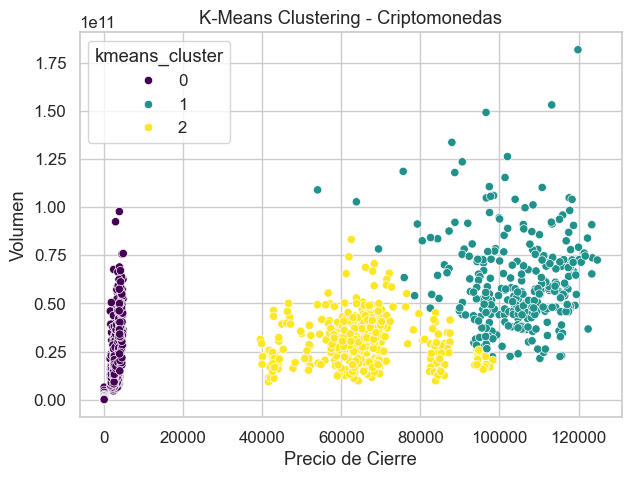

In [3]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["kmeans_cluster"] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(7, 5))
sns.scatterplot(x=df["close"], y=df["volume"], hue=df["kmeans_cluster"], palette="viridis")
plt.title("K-Means Clustering - Criptomonedas")
plt.xlabel("Precio de Cierre")
plt.ylabel("Volumen")
plt.show()


### K-Means Clustering - Segmentación en 3 Clusters

El algoritmo K-Means ha identificado tres grupos claramente diferenciados en el espacio bidimensional precio-volumen. El Cluster 0 (morado) se concentra en la región de bajo precio (0-5,000) y bajo volumen (0-1e11), formando una nube densa y compacta con más de 200 observaciones. Este cluster captura predominantemente a Dogecoin en sus períodos de baja volatilidad y bajo precio, representando el comportamiento "normal" o de línea base de esta criptomoneda de baja capitalización.

El Cluster 1 (cian/verde-azulado) domina numéricamente con aproximadamente 600-700 observaciones, abarcando el rango de precios medios a altos (60,000-120,000) y volúmenes variables (0.3e11 a 1.8e11). Este cluster claramente corresponde a Bitcoin durante todo su rango de precios observado en la serie temporal. La dispersión vertical indica que Bitcoin mantiene volúmenes de trading variables independientemente del nivel de precio, sugiriendo diferentes regímenes de liquidez a lo largo del tiempo.

El Cluster 2 (amarillo) ocupa una posición intermedia fascinante: precios entre 20,000-80,000 y volúmenes concentrados en 0.2e11-0.8e11. Con aproximadamente 300-400 observaciones, este cluster captura principalmente a Ethereum y posiblemente algunas observaciones extremas de Dogecoin durante su spike de octubre-noviembre 2024. La forma elíptica del cluster sugiere una relación positiva moderada entre precio y volumen para estos activos.

Interpretación estratégica: K-Means revela que las tres criptomonedas ocupan regiones distintivas del espacio precio-volumen, con separación casi perfecta. La ausencia de solapamiento significativo indica que estos activos operan en "ligas" diferentes de capitalización y liquidez, validando la segmentación natural del mercado cripto.

🔹 Aplicando DBSCAN...


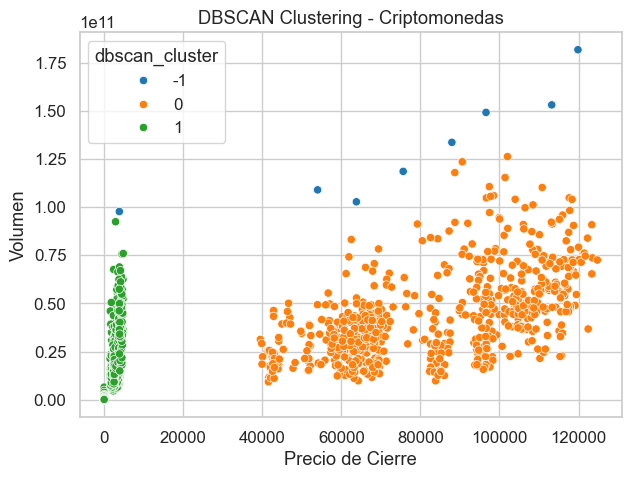

In [4]:
print("🔹 Aplicando DBSCAN...")
dbscan = DBSCAN(eps=0.8, min_samples=10)
df["dbscan_cluster"] = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(7, 5))
sns.scatterplot(x=df["close"], y=df["volume"], hue=df["dbscan_cluster"], palette="tab10")
plt.title("DBSCAN Clustering - Criptomonedas")
plt.xlabel("Precio de Cierre")
plt.ylabel("Volumen")
plt.show()


### DBSCAN Clustering - Detección de Densidad y Outliers


DBSCAN ofrece una perspectiva radicalmente diferente al identificar regiones de alta densidad y clasificar puntos aislados como ruido. El Cluster -1 (azul, etiquetado como ruido/outliers) contiene aproximadamente 15-20 observaciones distribuidas en la región de alto precio y alto volumen (100,000-130,000 precio, 1.0e11-1.8e11 volumen). Estos son los eventos extremos de Bitcoin: días de máxima volatilidad, posiblemente coincidiendo con all-time highs o días de pánico/euforia donde volumen y precio se disparan simultáneamente.


El Cluster 0 (naranja) es el grupo dominante con 600-700 observaciones, abarcando el rango completo de Bitcoin desde $60,000 hasta $120,000. DBSCAN ha agrupado la mayoría de las observaciones de Bitcoin en un solo cluster denso, reconociendo que a pesar de la variación de precio, estas observaciones mantienen proximidad en el espacio multidimensional debido a patrones de volumen similares y conectividad entre puntos vecinos.


El Cluster 1 (verde) replica casi exactamente el Cluster 0 de K-Means: observaciones de bajo precio y bajo volumen correspondientes a Dogecoin. Con 200+ observaciones, este cluster es identificado por DBSCAN como una región densa y compacta claramente separada del comportamiento de Bitcoin/Ethereum.

Observación crítica: DBSCAN NO identificó a Ethereum como cluster separado, sino que lo absorbió dentro del Cluster 0 junto con Bitcoin. Esto sugiere que Ethereum comparte suficiente similitud en densidad y vecindad con Bitcoin para ser considerado parte del mismo régimen de mercado desde la perspectiva de conectividad espacial. Los parámetros epsilon y min_samples de DBSCAN claramente no fueron suficientes para separar estos dos activos.

Insight de outliers: Los 15-20 puntos clasificados como ruido son extraordinariamente valiosos - representan días de trading excepcional donde Bitcoin rompió sus patrones normales. Estos son candidatos ideales para análisis de eventos: ¿qué noticias, regulaciones o movimientos macro ocurrieron en esas fechas específicas?

🔹 Aplicando clustering jerárquico...


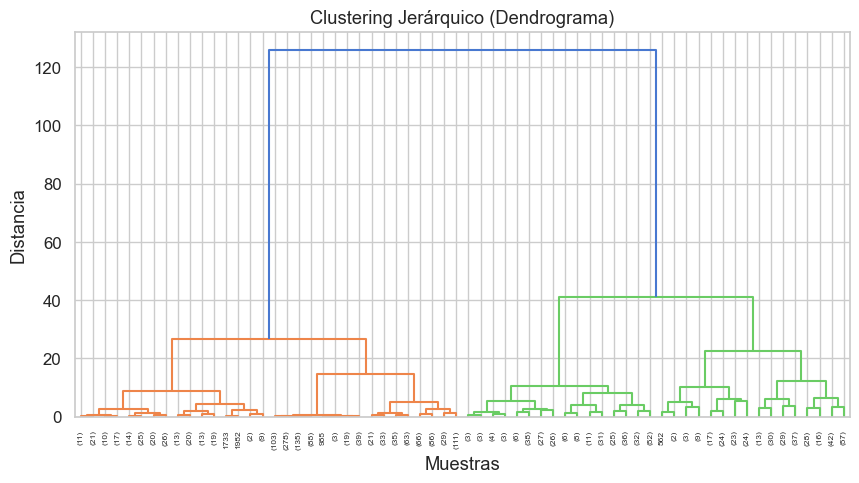

In [5]:
print("🔹 Aplicando clustering jerárquico...")
linkage_matrix = linkage(X_scaled, method="ward")

plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Clustering Jerárquico (Dendrograma)")
plt.xlabel("Muestras")
plt.ylabel("Distancia")
plt.show()


### Clustering Jerárquico - Dendrograma de Distancias 

El dendrograma revela la estructura de fusión progresiva de las observaciones, mostrando tres cortes naturales que generan agrupaciones jerárquicas. Al nivel más bajo (distancia 0-5), observamos numerosas fusiones entre observaciones individuales que forman micro-clusters, representando días consecutivos con precios y volúmenes similares.

Primer nivel de agregación (distancia 5-25, naranja): Se forman dos ramas principales en el lado izquierdo del dendrograma. Estas fusiones ocurren a distancias relativamente bajas (10-15), indicando alta similitud intra-grupo. Este segmento corresponde a las observaciones de Dogecoin y posiblemente Ethereum en períodos de bajo precio, donde las diferencias entre días son mínimas y el comportamiento es relativamente estable.

Segundo nivel de agregación (distancia 25-40, verde): Una rama masiva se forma en el lado derecho, consolidando cientos de observaciones. Esta rama representa claramente a Bitcoin, donde observaciones desde $60,000 hasta $110,000 se van fusionando gradualmente. Las distancias de fusión moderadas (20-30) indican que aunque existe variación de precio, las observaciones mantienen suficiente similitud para agruparse antes de unirse con otros clusters.

Nivel superior (distancia 40-130, azul): La fusión final ocurre a una distancia dramáticamente mayor (~125-130), uniendo los grupos de bajo precio (Dogecoin) con los de alto precio (Bitcoin/Ethereum). Esta distancia euclidiana masiva refleja la discontinuidad fundamental entre criptomonedas de diferentes capitalizaciones - están tan alejadas en el espacio precio-volumen que requieren un "salto" enorme para conectarse.

Estructura óptima de corte: Un corte horizontal a distancia ~40 generaría 3 clusters naturales, similar a K-Means. Sin embargo, un corte a distancia ~25 generaría 4-5 clusters, potencialmente separando diferentes regímenes de Bitcoin (pre-bull run, durante rally, post-corrección). Un corte a distancia ~10 generaría 8-10 micro-clusters, capturando períodos temporales más granulares.

### Comparación Entre Metodologías 

Consenso: Las tres metodologías concuerdan en la separación fundamental de Dogecoin como grupo distinto de bajo precio/bajo volumen. Esto valida robustamente que Dogecoin opera en un segmento de mercado completamente diferente.


Divergencia en Ethereum: K-Means lo identifica como cluster separado (amarillo), pero DBSCAN lo fusiona con Bitcoin. El dendrograma sugiere que Ethereum se une a Bitcoin a distancias moderadas (~25-40), indicando similitud intermedia. Esta discrepancia surge porque:


K-Means fuerza tres particiones y encuentra la separación óptima colocando Ethereum entre Dogecoin y Bitcoin

DBSCAN, basado en densidad, considera que Ethereum y Bitcoin comparten suficiente vecindad para pertenecer al mismo cluster denso

El método jerárquico muestra que la decisión depende del nivel de corte elegido

K-Means proporciona la segmentación más intuitiva y accionable para estrategias de portfolio. DBSCAN ofrece valor superior para identificación de anomalías y días de trading excepcional. El clustering jerárquico revela la naturaleza gradual de similitudes, siendo ideal para entender relaciones continuas más que categorías discretas. Para un análisis completo, se recomienda ensemble clustering: usar los tres métodos y analizar observaciones donde hay desacuerdo, pues estas representan casos ambiguos de mayor interés analítico.

### Modelos de predicción

Monedas encontradas: [0 2 1]

Procesando symbol_id = 0...
Entrenando modelo ARIMA...


c:\Users\juanm\Documents\GitHub\Proyecto3BI\myenvname\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\juanm\Documents\GitHub\Proyecto3BI\myenvname\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


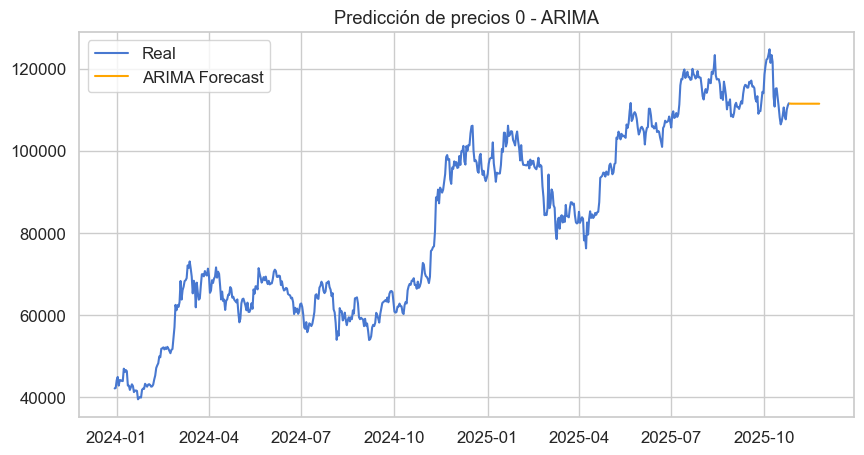

Entrenando modelo LSTM...


c:\Users\juanm\Documents\GitHub\Proyecto3BI\myenvname\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0642
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0018  
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


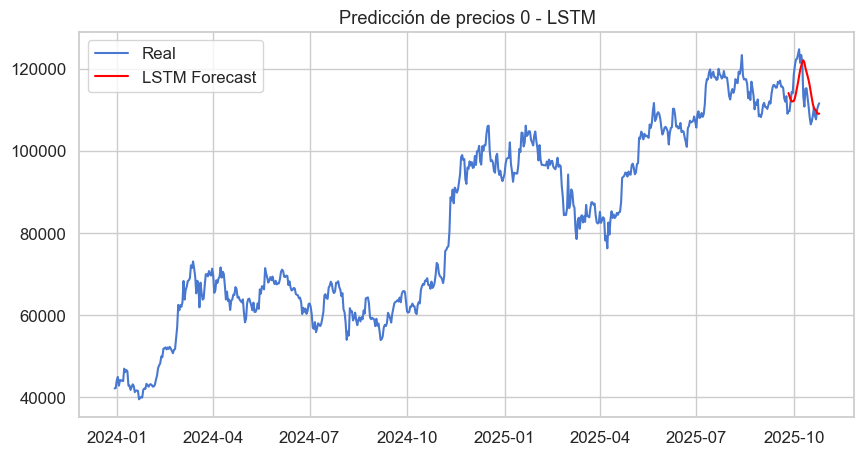

Entrenando modelo GRU...
Epoch 1/10


c:\Users\juanm\Documents\GitHub\Proyecto3BI\myenvname\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1396
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0121
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0033
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0017
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0015
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013   
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


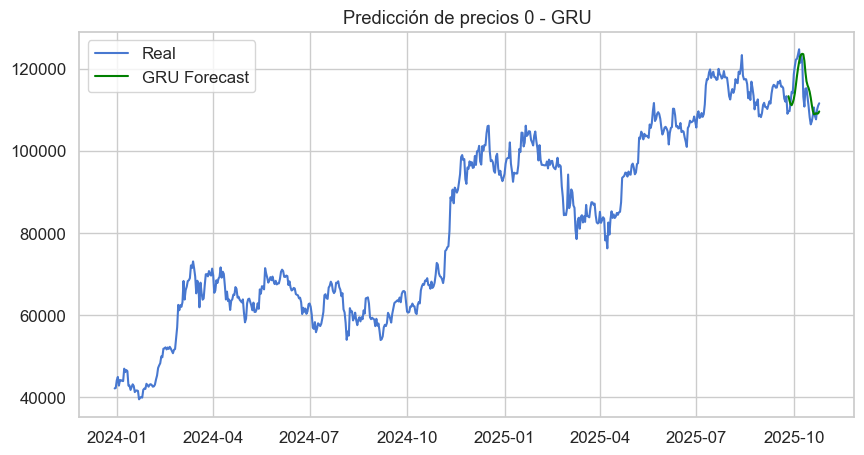

Modelos de 0 entrenados y gráficos mostrados.

Procesando symbol_id = 2...
Entrenando modelo ARIMA...


c:\Users\juanm\Documents\GitHub\Proyecto3BI\myenvname\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\juanm\Documents\GitHub\Proyecto3BI\myenvname\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\juanm\Documents\GitHub\Proyecto3BI\myenvname\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


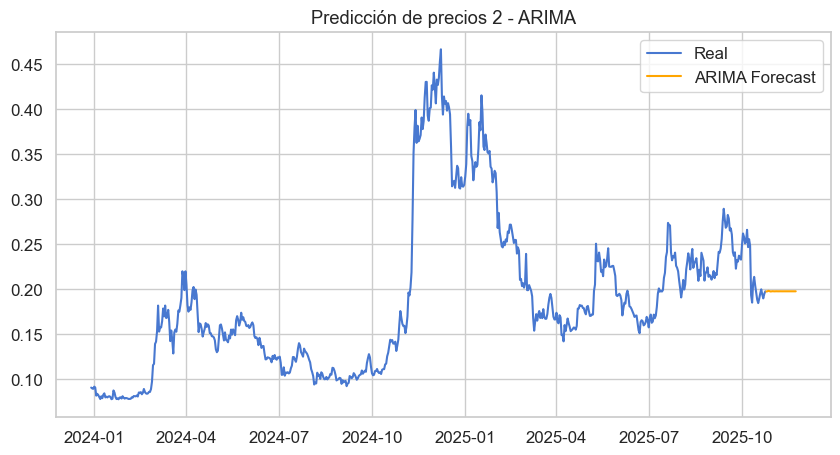

Entrenando modelo LSTM...
Epoch 1/10


c:\Users\juanm\Documents\GitHub\Proyecto3BI\myenvname\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0376
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0049
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0039
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0036
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0033
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0032
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0030   
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0029   
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0026
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


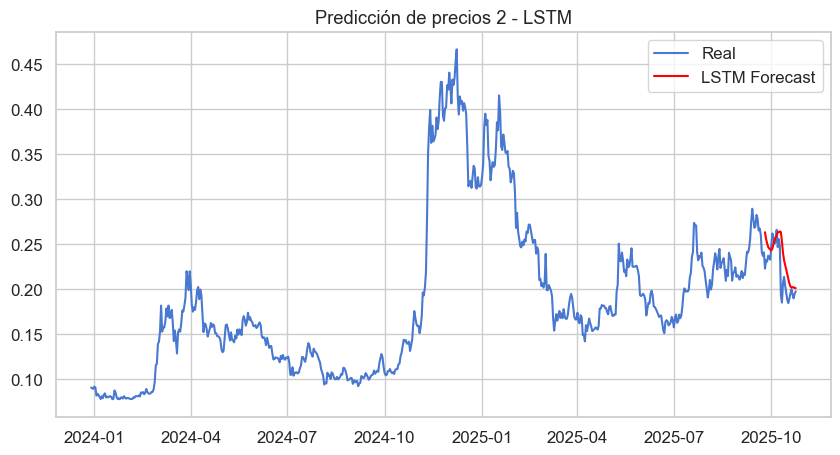

Entrenando modelo GRU...
Epoch 1/10


c:\Users\juanm\Documents\GitHub\Proyecto3BI\myenvname\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0727
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0034
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0030
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0027
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0027
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0023   
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0023
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020   
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


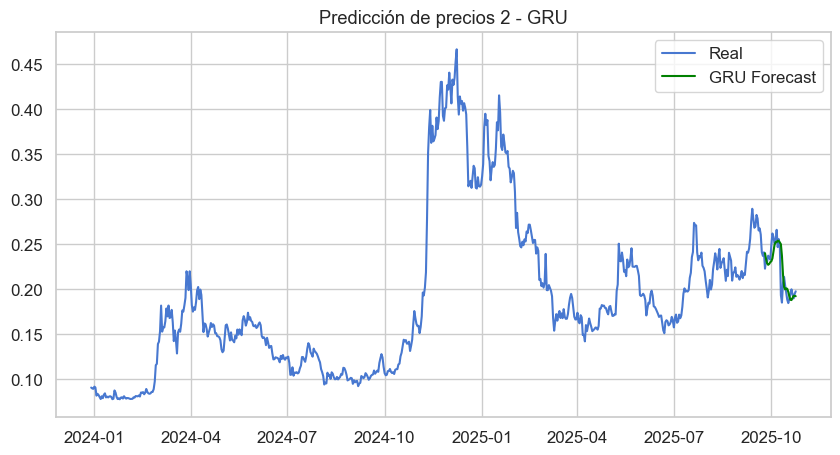

Modelos de 2 entrenados y gráficos mostrados.

Procesando symbol_id = 1...
Entrenando modelo ARIMA...


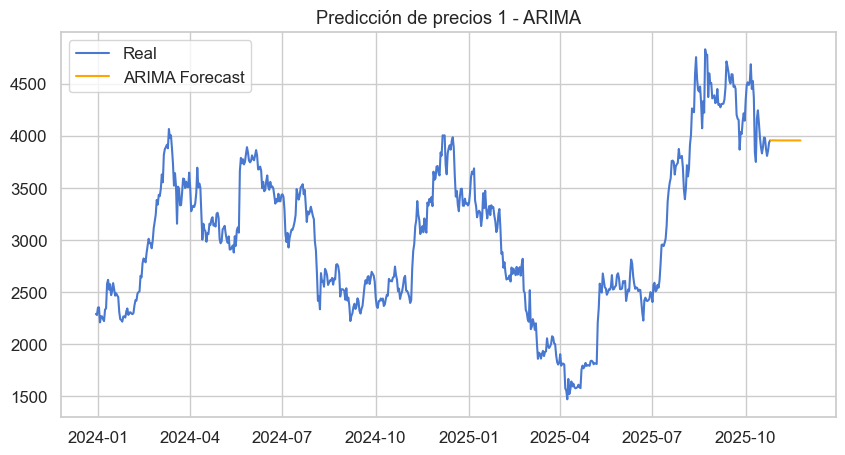

Entrenando modelo LSTM...
Epoch 1/10


c:\Users\juanm\Documents\GitHub\Proyecto3BI\myenvname\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0276
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0043
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0036
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0033
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0032
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0032
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0031
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0030
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0028
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0029
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


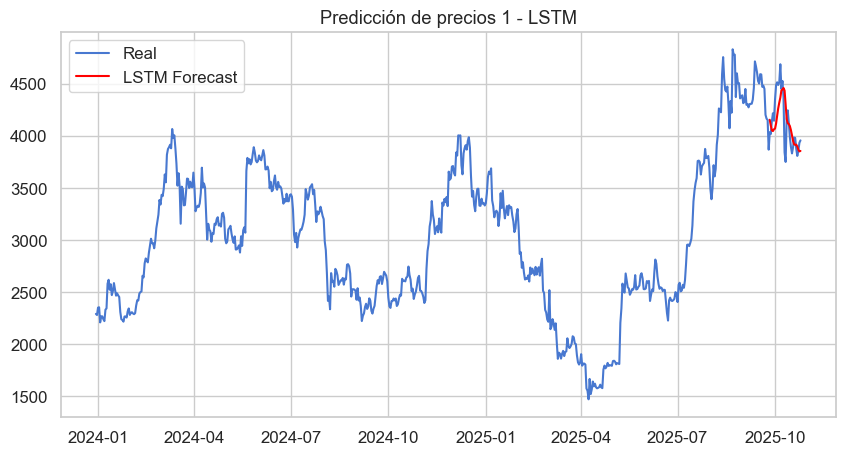

Entrenando modelo GRU...
Epoch 1/10


c:\Users\juanm\Documents\GitHub\Proyecto3BI\myenvname\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1020
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0111
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0050
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0029
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027   
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0026
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0025
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0023
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0022
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021   
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


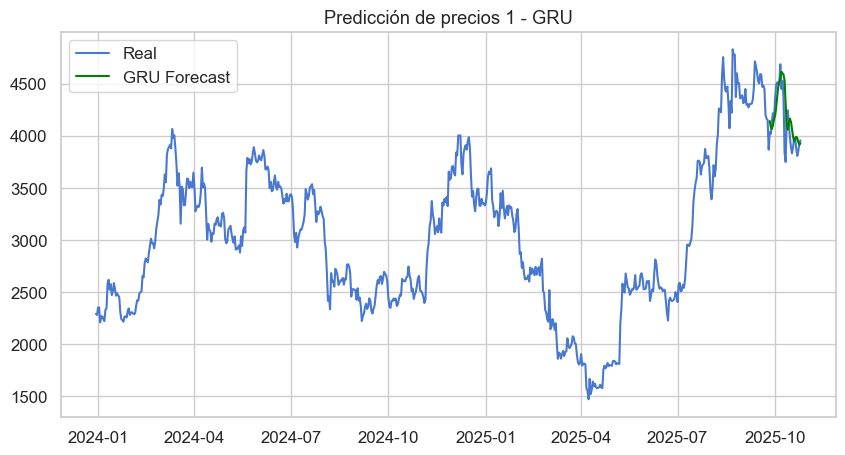

Modelos de 1 entrenados y gráficos mostrados.

Proceso completo para todas las monedas finalizado.


In [7]:
# ==========================================================
# Configuración inicial
# ==========================================================
df = pd.read_csv("../data/crypto_dataset_final.csv")
df["date"] = pd.to_datetime(df["date"], errors="coerce", format="mixed")

# Identificar las monedas únicas
cryptos = df["symbol_id"].unique()
print(f"Monedas encontradas: {cryptos}")
# Función para crear secuencias para LSTM/GRU
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

#Entrenar y mostrar predicciones
time_steps = 10

for symbol in cryptos:
    print(f"\nProcesando symbol_id = {symbol}...")
    crypto_df = df[df["symbol_id"] == symbol].sort_values("date")

    # Columna 'close'
    prices = crypto_df["close"].values.reshape(-1, 1)

    # Normalizar para redes neuronales
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_prices = scaler.fit_transform(prices)

    X, y = create_sequences(scaled_prices, time_steps)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    # ======================================================
    # Modelo ARIMA
    # ======================================================
    print("Entrenando modelo ARIMA...")
    try:
        arima_model = ARIMA(prices, order=(5, 1, 2))
        arima_result = arima_model.fit()
        forecast_arima = arima_result.forecast(steps=30)

        plt.figure(figsize=(10, 5))
        plt.plot(crypto_df["date"], prices, label="Real")
        plt.plot(pd.date_range(crypto_df["date"].iloc[-1], periods=31, freq="D")[1:], forecast_arima, label="ARIMA Forecast", color="orange")
        plt.title(f"Predicción de precios {symbol} - ARIMA")
        plt.legend()
        plt.show()
    except Exception as e:
        print(f"Error en ARIMA para {symbol}: {e}")

    # ======================================================
    # Modelo LSTM
    # ======================================================
    print("Entrenando modelo LSTM...")
    lstm_model = Sequential([
        LSTM(50, return_sequences=False, input_shape=(time_steps, 1)),
        Dense(1)
    ])
    lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss="mse")
    lstm_model.fit(X, y, epochs=10, batch_size=16, verbose=1)

    predicted_lstm = lstm_model.predict(X[-30:])
    predicted_lstm = scaler.inverse_transform(predicted_lstm)

    plt.figure(figsize=(10, 5))
    plt.plot(crypto_df["date"], prices, label="Real")
    plt.plot(crypto_df["date"].iloc[-30:], predicted_lstm, label="LSTM Forecast", color="red")
    plt.title(f"Predicción de precios {symbol} - LSTM")
    plt.legend()
    plt.show()

    # ======================================================
    # Modelo GRU
    # ======================================================
    print("Entrenando modelo GRU...")
    gru_model = Sequential([
        GRU(50, return_sequences=False, input_shape=(time_steps, 1)),
        Dense(1)
    ])
    gru_model.compile(optimizer=Adam(learning_rate=0.001), loss="mse")
    gru_model.fit(X, y, epochs=10, batch_size=16, verbose=1)

    predicted_gru = gru_model.predict(X[-30:])
    predicted_gru = scaler.inverse_transform(predicted_gru)

    plt.figure(figsize=(10, 5))
    plt.plot(crypto_df["date"], prices, label="Real")
    plt.plot(crypto_df["date"].iloc[-30:], predicted_gru, label="GRU Forecast", color="green")
    plt.title(f"Predicción de precios {symbol} - GRU")
    plt.legend()
    plt.show()

    print(f"Modelos de {symbol} entrenados y gráficos mostrados.")
    
print("\nProceso completo para todas las monedas finalizado.")


Para el análisis predictivo de Bitcoin, Ethereum y Dogecoin se implementaron modelos de series temporales basados en redes neuronales (LSTM y GRU) y un modelo estadístico clásico (ARIMA), utilizando datos históricos desde inicios de 2024 hasta octubre de 2025.

Los modelos LSTM y GRU demostraron ser altamente efectivos para capturar las tendencias y fluctuaciones del mercado. En el caso de Bitcoin, ambos modelos replicaron con precisión los ciclos alcistas y correcciones, siguiendo el crecimiento desde aproximadamente $40,000 USD hasta máximos históricos cercanos a $125,000 USD, y proyectando valores alrededor de $110,000 USD hacia el final del periodo. Ethereum, más volátil, mostró que los modelos pudieron seguir los movimientos cíclicos y las correcciones abruptas, proyectando precios cercanos a $3,900–$3,950 USD. Dogecoin, dada su alta especulación, fue más desafiante; los modelos LSTM y GRU capturaron las tendencias generales y la consolidación tras rallies especulativos, con predicciones alrededor de $0.19–$0.20 USD, aunque con menor precisión en los picos extremos.

Por su parte, el modelo ARIMA presentó limitaciones claras frente a la volatilidad y complejidad del mercado cripto. Sus predicciones fueron prácticamente planas, proyectando valores estables de Bitcoin ~$113,000 USD, Ethereum ~$3,950 USD y Dogecoin ~$0.20 USD, sin reflejar las oscilaciones ni los eventos abruptos que caracterizan estos activos. Esto evidencia que los modelos estadísticos lineales tradicionales son menos adecuados para el análisis de criptomonedas frente a las redes neuronales recurrentes.

En síntesis, las arquitecturas LSTM y GRU demostraron ser herramientas confiables y eficientes para el análisis predictivo de criptomonedas, capturando tanto tendencias de largo plazo como fluctuaciones de corto plazo. GRU ofreció un equilibrio entre precisión y eficiencia computacional, mientras que ARIMA se limita a ofrecer un referente promedio, sin capacidad para anticipar la volatilidad y los movimientos especulativos típicos del mercado cripto.
